In [5]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import datetime
import numpy as np
import math

In [6]:
ticker = input("Enter the stock ticker to be analyzed: ")
length = input("Choose a time period by entering a number, a space, and " + 
               "then a letter [d-day, w-week, m-month, y-year]. For example, to choose 5 days, type '5 d': ")

timeline = 0
if length[2] == 'd':
    timeline = int(length[0])
elif length[2] == 'w':
    timeline = int(length[0]) * 7
elif length[2] == 'm':
    timeline = int(length[0]) * 30
elif length[2] == 'y':
    timeline = int(length[0]) * 365
else:
    quit()

print("The number of days is: " + str(timeline))

Enter the stock ticker to be analyzed: AAPL
Choose a time period by entering a number, a space, and then a letter [d-day, w-week, m-month, y-year]. For example, to choose 5 days, type '5 d': 5 y
The number of days is: 1825


In [7]:
today = date.today()
date5da = today - datetime.timedelta(5)

start_date = str(today - datetime.timedelta(timeline))
end_date = str(today)

print("start date: " + start_date)
print("end date: " + end_date)

start date: 2017-05-20
end date: 2022-05-19


In [8]:
panel_data = data.DataReader(ticker, 'yahoo', start_date, end_date)
panel_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-22,38.645000,38.227501,38.500000,38.497501,91865600.0,36.444286
2017-05-23,38.724998,38.327499,38.724998,38.450001,79675600.0,36.399323
2017-05-24,38.542500,38.167500,38.459999,38.334999,76712000.0,36.290443
2017-05-25,38.587502,38.257500,38.432499,38.467499,76942400.0,36.415874
2017-05-26,38.560001,38.327499,38.500000,38.402500,87710400.0,36.354347
...,...,...,...,...,...,...
2022-05-13,148.100006,143.110001,144.589996,147.110001,113787000.0,147.110001
2022-05-16,147.520004,144.179993,145.550003,145.539993,86643800.0,145.539993
2022-05-17,149.770004,146.679993,148.860001,149.240005,78336300.0,149.240005


In [9]:
close = panel_data['Close']

all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

close = close.reindex(all_weekdays)

close = close.fillna(method='ffill')

close

2017-05-22     38.497501
2017-05-23     38.450001
2017-05-24     38.334999
2017-05-25     38.467499
2017-05-26     38.402500
                 ...    
2022-05-13    147.110001
2022-05-16    145.539993
2022-05-17    149.240005
2022-05-18    140.820007
2022-05-19    138.919998
Freq: B, Name: Close, Length: 1304, dtype: float64

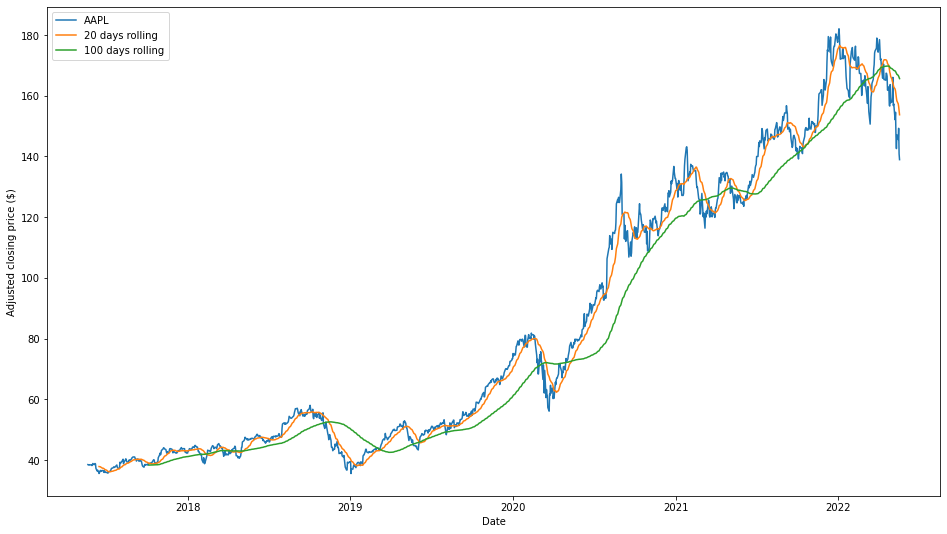

In [10]:
#Using Simple Moving Average
short_rolling_msft = close.rolling(window=20).mean()
long_rolling_msft = close.rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker.upper())
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

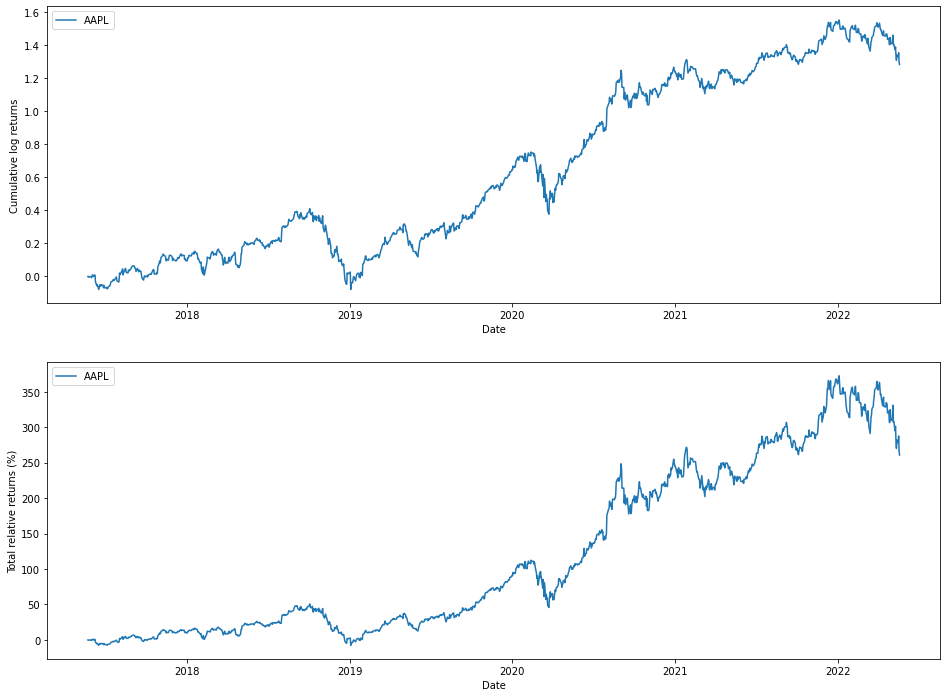

In [42]:
values = close

log_returns = np.log(values).diff()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

ax1.plot(log_returns.index, log_returns.cumsum(), label=ticker)
    
ax1.set_ylabel('Cumulative log returns')
ax1.set_xlabel('Date')
ax1.legend(loc='best')

ax2.plot(log_returns.index, 100*(np.exp(log_returns.cumsum()) - 1), label=ticker)
    
ax2.set_ylabel('Total relative returns (%)')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

plt.show()

In [12]:
days = timeline
years = days / 365

final_returns = 100*(np.exp(log_returns.cumsum()) - 1)[-1]

print('Return from start date to end date is: ' + '{:.2f}'.format(final_returns) + '%')

final_returns_per_year = final_returns / years

print('Average yearly return: ' + '{:.2f}'.format(final_returns_per_year) + '%')

Return from start date to end date is: 260.85%
Average yearly return: 52.17%


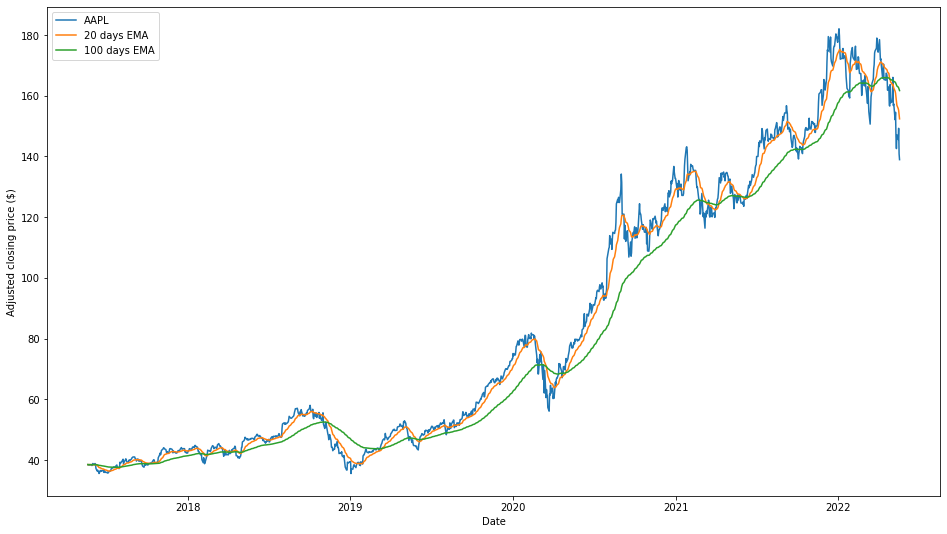

In [13]:
#Using exponential moving average

fig, ax = plt.subplots(figsize=(16,9))

ema_short = close.ewm(span = 20, adjust=False).mean()
ema_long = close.ewm(span = 100, adjust=False).mean()

ax.plot(close.index, close, label=ticker.upper())
ax.plot(ema_short.index, ema_short, label="20 days EMA")
ax.plot(ema_long.index, ema_long, label="100 days EMA")

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

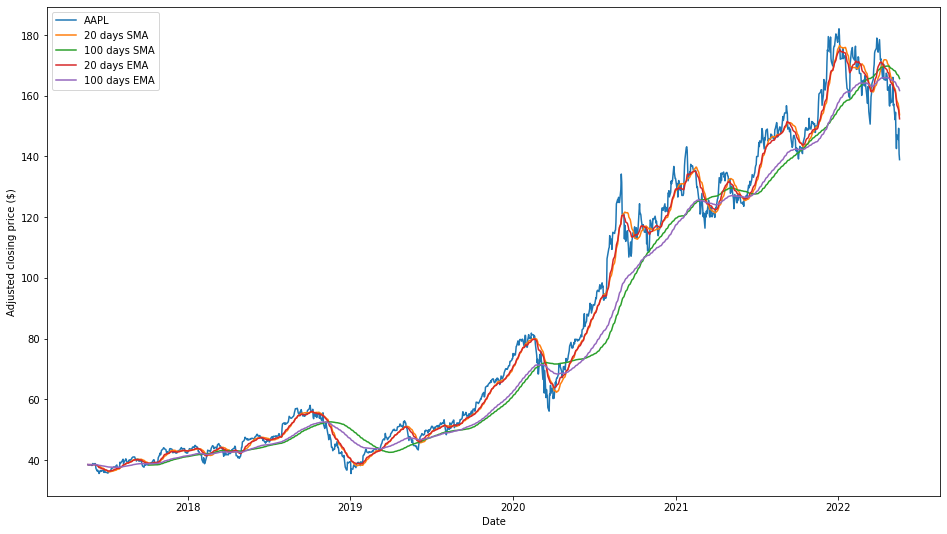

In [14]:
#Exponential vs Simple moving average
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker.upper())
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days SMA')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days SMA')
ax.plot(ema_short.index, ema_short, label="20 days EMA")
ax.plot(ema_long.index, ema_long, label="100 days EMA")

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

Volatility across entire timescale is: 70.95%


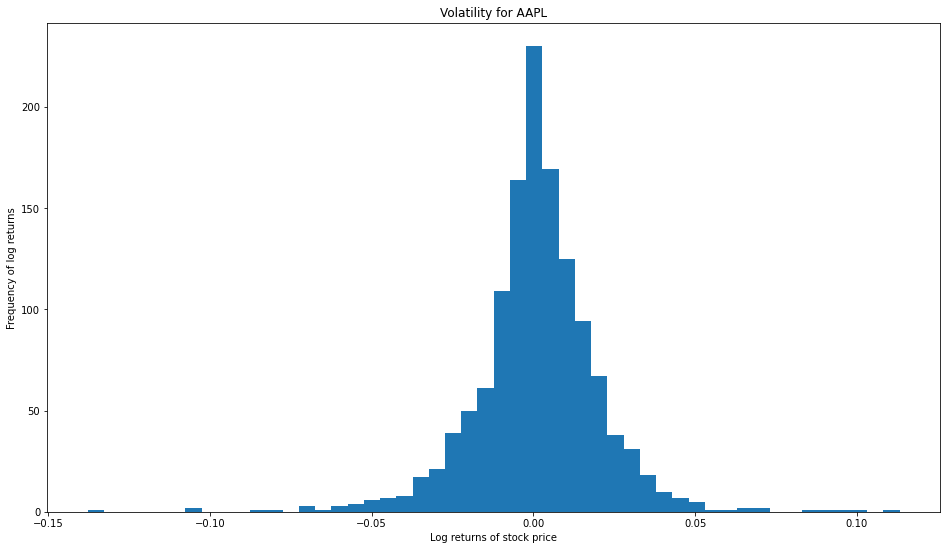

In [56]:
daily_sd = np.std(log_returns)

sd = daily_sd * (252 * years) ** 0.5

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
n, bins, patches = ax.hist(log_returns.values, bins=50)

ax.set_xlabel('Log returns of stock price')
ax.set_ylabel('Frequency of log returns')
ax.set_title('Volatility for ' + ticker)

x_corr = ax.get_xlim()
y_corr = ax.get_ylim()

volatility = math.sqrt(days * ((log_returns ** 2).sum()  (days - 1)))

print('Volatility across entire timescale is: ' + '{:.2f}'.format(volatility * 100) + '%')

ax.set_ylim(y_corr[0], y_corr[1])

plt.show()

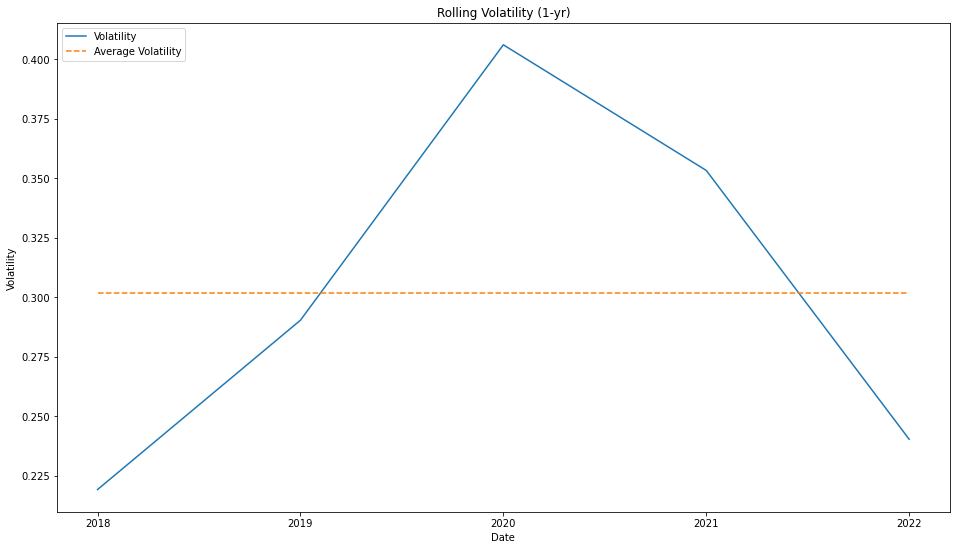

In [75]:
rolling_volatility = []

all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

log_returns = log_returns.reindex(all_weekdays)

log_returns = log_returns.fillna(method='ffill')

for x in range(0, int(years)):
    rolling_volatility.append(math.sqrt(253 * ((log_returns[x * 253: x * 253 + 253] ** 2).sum() / (253 - 1))))

years_list = []
for y in log_returns.index:
    if str(y)[0:4] not in years_list:
        years_list.append(str(y)[0:4])
        
fig, ax = plt.subplots(figsize=(16,9))

average_rolling_volatility = 0
for y in rolling_volatility:
    average_rolling_volatility += y
average_rolling_volatility = average_rolling_volatility / years
average_rolling_volatility_ls = [average_rolling_volatility] * int(years)
    
ax.plot(years_list[1:], rolling_volatility, label='Volatility')
ax.plot(years_list[1:], average_rolling_volatility_ls, label='Average Volatility', linestyle="dashed")


ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
ax.set_title('Rolling Volatility (1-yr)')
ax.legend(loc='upper left')

Overall Sharpe Ratio across entire timescale is: 2.14


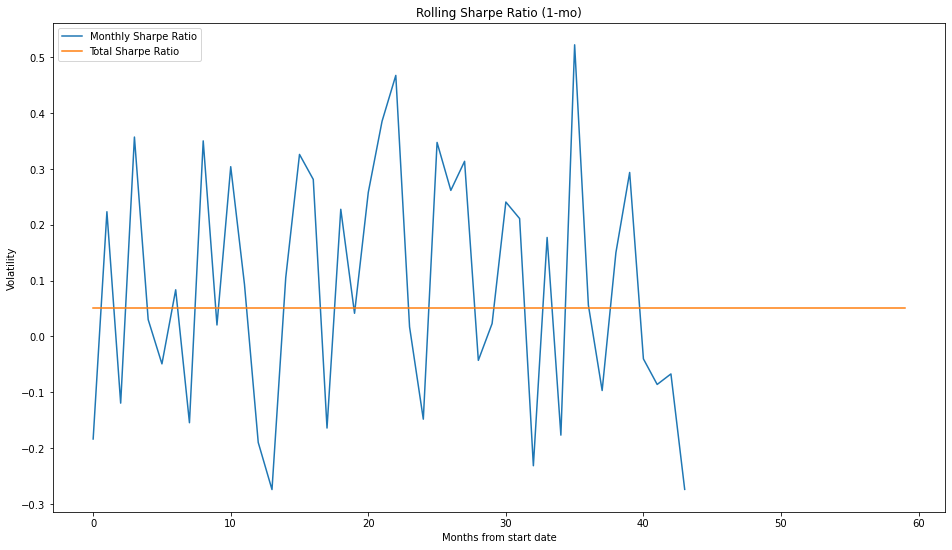

In [78]:
total_sharpe_ratio = log_returns.mean() / log_returns.std() 

print('Overall Sharpe Ratio across entire timescale is: ' + '{:.2f}'.format(total_sharpe_ratio * (days ** 0.5)))

## Monthly Sharpe Ratio

rolling_sharpe_ratio = []
months = years * 12
for x in range(0, int(months)):
    rolling_sharpe_ratio.append(log_returns[x * 30 : x * 30 + 30].mean() / log_returns[x * 30 : x * 30 + 30].std())
    
total_sharpe_ratio_ls = [total_sharpe_ratio] * int(months)
    
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(rolling_sharpe_ratio, label='Monthly Sharpe Ratio')
ax.plot(total_sharpe_ratio_ls, label='Total Sharpe Ratio')

ax.set_xlabel('Months from start date')
ax.set_ylabel('Volatility')
ax.set_title('Rolling Sharpe Ratio (1-mo)')
ax.legend(loc='upper left')